### Analysing delivery status with the factors which can cause early or late delivery.

# Context -

When the company delivers a courier,most of the time it reaches the customer's address on time but there has been a  little rise in late deliveries recently,so we were given this historical data to analyze and recognize the factors affecting late deliveries.


### The Analysis -

### 1) Importing libraries and understanding the dataset :

In [123]:
#importing the libraries-

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [124]:
# mounting the drive to google colab so we can get the dataset-

from google.colab import drive
drive.mount('/content/drive/')

!ls "/content/drive/My Drive"

!ls "/content/drive/My Drive/data science"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'Analytical Aptitude (1).gdoc'	'Colab Notebooks'  'Python Adv Assessment.gdoc'
'Analytical Aptitude.gdoc'	'data science'	   'Python Assessment-1.gdoc'
'Batch - 10 DEC'		 DV.gdoc
 Classroom			'Google Photos'
 Archive				   IMG_20210302_160336.jpg
'Bank Customer Churn Prediction (1).csv'   insurance.csv
'Face Recognition.ipynb'		  'intern dataset.csv'
 fedex.csv


In [125]:
# the dataset to be used-

fedex = pd.read_csv( "/content/drive/My Drive/data science/fedex.csv")

In [126]:
# the dataset-

fedex.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [127]:
#shape of dataset-

fedex.shape

(3604175, 15)

Inference-

The dataset hass 3604175 rows and 15 columns

In [128]:
# information regarding dataset-

fedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


Inference-

The dataset has datatype: 

4 columns of float type

8 columns integer type

3 columns object type.

The entries-3604175

In [129]:
#describing numerical columns-

fedex.describe()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status
count,3604175.0,3.604175e+06,3.604175e+06,3.604175e+06,3.522573e+06,3.604175e+06,3.604175e+06,3.604175e+06,3.603628e+06,3.522573e+06,3.604175e+06,3.522573e+06
mean,2008.0,3.514942e+00,1.568481e+01,3.934604e+00,1.338455e+03,1.329371e+03,1.495305e+03,2.223795e+03,1.291603e+02,1.115893e+01,7.280915e+02,2.038890e-01
std,0.0,1.709912e+00,8.763332e+00,1.987126e+00,4.814053e+02,4.664365e+02,4.854825e+02,1.944583e+03,6.951011e+01,3.618888e+01,5.611318e+02,4.028875e-01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-2.500000e+01,-9.200000e+01,1.100000e+01,0.000000e+00
25%,2008.0,2.000000e+00,8.000000e+00,2.000000e+00,9.290000e+02,9.250000e+02,1.115000e+03,6.160000e+02,8.000000e+01,-4.000000e+00,3.250000e+02,0.000000e+00
50%,2008.0,4.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.321000e+03,1.519000e+03,1.573000e+03,1.110000e+02,-1.000000e+00,5.830000e+02,0.000000e+00
75%,2008.0,5.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.910000e+03,3.602000e+03,1.600000e+02,1.000000e+01,9.570000e+02,0.000000e+00
max,2008.0,6.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,9.741000e+03,1.435000e+03,2.467000e+03,4.962000e+03,1.000000e+00


Inference-

Year, Month, DayofMonth, DayOfWeek, Actual_Shipment_Time,Planned_Shipment_Time, Planned_Delivery_Time, Carrier_Num, Planned_TimeofTravel, Shipment_Delay, Distance and Delivery_Status are the numerical columns described above along with their mean,min and max.

In [130]:
fedex[fedex['Actual_Shipment_Time'] > 2359]

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
102382,2008,1,4,5,2400.0,2015,2249,XE,7826,154.0,225.0,LAX,PDX,834,1.0
102405,2008,1,27,7,2400.0,2015,2249,XE,7826,154.0,225.0,LAX,PDX,834,1.0
130963,2008,1,3,4,2400.0,2352,221,YV,2984,89.0,8.0,LAS,SLC,368,0.0
132440,2008,1,5,6,2400.0,2359,221,YV,2863,82.0,1.0,LAS,YUM,238,0.0
136781,2008,1,11,5,2400.0,2355,110,YV,2791,75.0,5.0,LAS,FAT,258,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545613,2008,6,15,7,2400.0,2359,341,B6,701,222.0,1.0,JFK,SJU,1597,0.0
3546117,2008,6,16,1,2400.0,1805,2136,B6,95,391.0,355.0,JFK,OAK,2576,1.0
3546830,2008,6,17,2,2400.0,2359,815,B6,88,316.0,1.0,ONT,JFK,2430,0.0
3548434,2008,6,20,5,2400.0,2320,157,B6,723,157.0,40.0,MCO,BQN,1129,1.0


In [131]:
fedex.drop(fedex[fedex.Actual_Shipment_Time > 2359].index,inplace=True)

In [132]:
fedex[fedex['Planned_Delivery_Time'] > 2359]

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
454781,2008,1,7,1,1130.0,1115,2400,9E,2807,NaN,15.0,MSP,CID,221,0.0
455112,2008,1,5,6,916.0,805,2400,9E,2825,NaN,71.0,IDA,MSP,939,1.0
455680,2008,1,17,4,1947.0,1910,2400,9E,2860,NaN,37.0,MSP,TVC,375,1.0
455946,2008,1,14,1,927.0,921,2400,9E,2874,NaN,6.0,DTW,TVC,207,0.0
457502,2008,1,16,3,2120.0,2123,2400,9E,2930,NaN,-3.0,DTW,AVP,398,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471103,2008,6,12,4,1922.0,1925,2400,9E,5905,NaN,-3.0,MEM,ICT,453,0.0
3471766,2008,6,3,2,1323.0,1325,2400,9E,5925,NaN,-2.0,MEM,DEN,872,0.0
3471832,2008,6,5,4,2200.0,1921,2400,9E,5927,NaN,159.0,MEM,DEN,872,1.0
3471847,2008,6,20,5,1922.0,1921,2400,9E,5927,NaN,1.0,MEM,DEN,872,0.0


In [133]:
fedex.drop(fedex[fedex.Planned_Delivery_Time > 2359].index,inplace=True)

Inference-

we are dropping values exceeding 2359 because 24 hours time format doesn't count 2400, when there is 12 and 0 present. it will cause anamolies and error in the data.

 ### 2) Cleaning the dataset :


### a) Checking null values if present-

In [134]:
# total null values present in each column-

fedex.isna().sum()

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Actual_Shipment_Time     81602
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Planned_TimeofTravel       163
Shipment_Delay           81602
Source                       0
Destination                  0
Distance                     0
Delivery_Status          81602
dtype: int64

Inference-

There are 81602 null values present in Actual_shipment_time,shipment_delay and delivery status.

There are 547 null values present in planned time of travel.

In [135]:
# dropping the null values-

fedex.dropna(inplace=True)

In [136]:
fedex.shape

(3521864, 15)

After dropping null values we have 3522167 rows and 15 columns.

### b) checking for duplicate values-

In [137]:
# the duplicate values-

fedex.duplicated().sum()

4

There are 4 duplicate rows.

In [138]:
# drop duplicate values-

fedex.drop_duplicates(inplace=True)

In [139]:
fedex.shape

(3521860, 15)

After dropping null values we have 3522163 rows and 15 columns.

### converting the columns into timedate format-

The time format is incorrect and we need a correct format to calculate them.

In [140]:
# converting from float to integer type-

fedex['Actual_Shipment_Time'] = fedex['Actual_Shipment_Time'].astype(int)

In [141]:
# dividing the values by 100 to get decimal point in the middle-

fedex[['Actual_Shipment_Time','Planned_Shipment_Time','Planned_Delivery_Time']] = fedex[['Actual_Shipment_Time','Planned_Shipment_Time','Planned_Delivery_Time']] / 100

In [142]:
# converting from int to string-

fedex[['Actual_Shipment_Time','Planned_Shipment_Time','Planned_Delivery_Time']] = fedex[['Actual_Shipment_Time','Planned_Shipment_Time','Planned_Delivery_Time']].astype(str)

In [143]:
# using replace function to replace decimal point with ':'-

fedex['actual_shipment_time'] =   fedex['Actual_Shipment_Time'].str.replace('.',':',regex=True)
fedex['planned_shipment_time'] =  fedex['Planned_Shipment_Time'].str.replace('.',':',regex=True)
fedex['planned_delivery_time'] =  fedex['Planned_Delivery_Time'].str.replace('.',':',regex=True)     

In [144]:
# creating new columns by converting them to hours and minutes format-

fedex['actual_shipment_time'] = pd.to_datetime(fedex['actual_shipment_time'], format='%H:%M')
fedex['planned_shipment_time'] = pd.to_datetime(fedex['planned_shipment_time'], format='%H:%M')
fedex['planned_delivery_time'] = pd.to_datetime(fedex['planned_delivery_time'], format='%H:%M')

In [145]:
# converting them to hours and minutes format-

fedex['actual_shipment_time'] = fedex['actual_shipment_time'].dt.strftime('%H:%M')
fedex['planned_shipment_time'] = fedex['planned_shipment_time'].dt.strftime('%H:%M')
fedex['planned_delivery_time'] = fedex['planned_delivery_time'].dt.strftime('%H:%M')

In [146]:
# reindexing the columns-

fedex = fedex.reindex(columns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'actual_shipment_time','planned_shipment_time', 'planned_delivery_time', 'Actual_Shipment_Time','Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name','Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source','Destination', 'Distance', 'Delivery_Status'])

In [147]:
# using replace function to replace decimal point with nothing-

fedex['Actual_Shipment_Time'] =   fedex['Actual_Shipment_Time'].str.replace('.','',regex=True)
fedex['Planned_Shipment_Time'] =  fedex['Planned_Shipment_Time'].str.replace('.','',regex=True)
fedex['Planned_Delivery_Time'] =  fedex['Planned_Delivery_Time'].str.replace('.','',regex=True)     

In [148]:
# converting to integer type-

fedex[['Actual_Shipment_Time','Planned_Shipment_Time','Planned_Delivery_Time']] = fedex[['Actual_Shipment_Time','Planned_Shipment_Time','Planned_Delivery_Time']].astype(int)

In [149]:
fedex.head()

,Year,Month,DayofMonth,DayOfWeek,actual_shipment_time,planned_shipment_time,planned_delivery_time,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,20:03,19:55,22:25,2003,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,07:54,07:35,10:00,754,735,100,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,06:28,06:02,07:05,628,62,75,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,09:26,09:03,11:00,926,93,110,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,18:29,17:55,19:25,1829,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [150]:
# converting to datetime format-

fedex['actual_shipment_time(hour)'] = pd.to_datetime(fedex['actual_shipment_time']).dt.hour
fedex['actual_shipment_time(minute)'] = pd.to_datetime(fedex['actual_shipment_time']).dt.minute

In [151]:
# converting to datetime format-

fedex['planned_shipment_time(hour)'] = pd.to_datetime(fedex['planned_shipment_time']).dt.hour
fedex['planned_shipment_time(minute)'] = pd.to_datetime(fedex['planned_shipment_time']).dt.minute

In [152]:
# converting to datetime format-

fedex['planned_delivery_time(hour)'] = pd.to_datetime(fedex['planned_delivery_time']).dt.hour
fedex['planned_delivery_time(minute)'] = pd.to_datetime(fedex['planned_delivery_time']).dt.minute

In [153]:
# converting delivery status from float to interger-

fedex.Delivery_Status = fedex.Delivery_Status.astype(int)

In [154]:
# the correlation between columns-

fedex.corr()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status,actual_shipment_time(hour),actual_shipment_time(minute),planned_shipment_time(hour),planned_shipment_time(minute),planned_delivery_time(hour),planned_delivery_time(minute)
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,-0.001760,0.011234,-0.001671,0.009219,0.001243,0.007536,-0.005641,-0.015303,0.004589,-0.021705,-0.005756,0.003456,-0.003051,0.010349,-0.006363,0.004842
DayofMonth,NaN,-0.001760,1.000000,-0.020050,-0.001303,-0.000010,-0.000338,0.002437,-0.000132,-0.014668,0.000465,-0.020108,-0.002260,0.000559,-0.001135,0.000524,-0.001408,0.000580
DayOfWeek,NaN,0.011234,-0.020050,1.000000,0.005702,0.002943,0.003568,-0.004478,0.015849,0.009257,0.017376,0.012385,0.006372,-0.000477,0.007331,0.000584,0.006086,-0.000036
Actual_Shipment_Time,NaN,-0.001671,-0.001303,0.005702,1.000000,0.326483,0.284876,-0.047129,0.008132,0.155197,0.009569,0.187047,0.704762,0.307533,0.684136,0.080964,0.555516,0.015025
Planned_Shipment_Time,NaN,0.009219,-0.000010,0.002943,0.326483,1.000000,0.215888,0.020995,-0.018912,0.063311,-0.019701,0.082758,0.435008,-0.017193,0.441133,0.658191,0.352428,0.034774
Planned_Delivery_Time,NaN,0.001243,-0.000338,0.003568,0.284876,0.215888,1.000000,-0.000029,0.039715,0.060066,0.025211,0.073242,0.408234,-0.006938,0.409677,0.060297,0.515141,0.531953
Carrier_Num,NaN,0.007536,0.002437,-0.004478,-0.047129,0.020995,-0.000029,1.000000,-0.326006,0.013596,-0.349203,0.011507,-0.006601,-0.031281,-0.014917,0.022573,-0.025951,0.026814
Planned_TimeofTravel,NaN,-0.005641,-0.000132,0.015849,0.008132,-0.018912,0.039715,-0.326006,1.000000,0.029860,0.982385,0.025758,-0.012970,0.014338,-0.009162,-0.007840,0.050919,0.013990
Shipment_Delay,NaN,-0.015303,-0.014668,0.009257,0.155197,0.063311,0.060066,0.013596,0.029860,1.000000,0.021467,0.678851,0.212371,-0.009300,0.145231,0.016047,0.139475,-0.004429


In [155]:
# the dataset-

fedex.head()

,Year,Month,DayofMonth,DayOfWeek,actual_shipment_time,planned_shipment_time,planned_delivery_time,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,...,Source,Destination,Distance,Delivery_Status,actual_shipment_time(hour),actual_shipment_time(minute),planned_shipment_time(hour),planned_shipment_time(minute),planned_delivery_time(hour),planned_delivery_time(minute)
0,2008,1,3,4,20:03,19:55,22:25,2003,1955,2225,...,IAD,TPA,810,0,20,3,19,55,22,25
1,2008,1,3,4,07:54,07:35,10:00,754,735,100,...,IAD,TPA,810,1,7,54,7,35,10,0
2,2008,1,3,4,06:28,06:02,07:05,628,62,75,...,IND,BWI,515,0,6,28,6,2,7,5
3,2008,1,3,4,09:26,09:03,11:00,926,93,110,...,IND,BWI,515,0,9,26,9,3,11,0
4,2008,1,3,4,18:29,17:55,19:25,1829,1755,1925,...,IND,BWI,515,1,18,29,17,55,19,25


# 3) Exploratory Data Analysis :

Delivery_status is the target variable.The reason is that these variables have a direct or indirect relationship with the delivery business.



### a) Analyzing the independent variables -

The columns to be included in Month, DayofMonth, DayOfWeek,	Actual_Shipment_Time ,Planned_Shipment_Time, Planned_Delivery_Time, Carrier_Name ,Carrier_Num ,Planned_TimeofTravel, Shipment_Delay, Source, Destination, Distance

In [156]:
# numbers of  distinct values  in each column-

fedex.nunique()

Year                                1
Month                               6
DayofMonth                         31
DayOfWeek                           7
actual_shipment_time             1318
planned_shipment_time            1092
planned_delivery_time            1239
Actual_Shipment_Time             1358
Planned_Shipment_Time            1169
Planned_Delivery_Time            1285
Carrier_Name                       20
Carrier_Num                      7338
Planned_TimeofTravel              498
Shipment_Delay                    997
Source                            297
Destination                       299
Distance                         1420
Delivery_Status                     2
actual_shipment_time(hour)         24
actual_shipment_time(minute)       55
planned_shipment_time(hour)        24
planned_shipment_time(minute)      55
planned_delivery_time(hour)        24
planned_delivery_time(minute)      55
dtype: int64

In [157]:
# the distinct values present in the month column-

(fedex.Month.value_counts()).sort_values(ascending=False)

5    599993
3    599786
6    597593
1    588320
4    587672
2    548496
Name: Month, dtype: int64

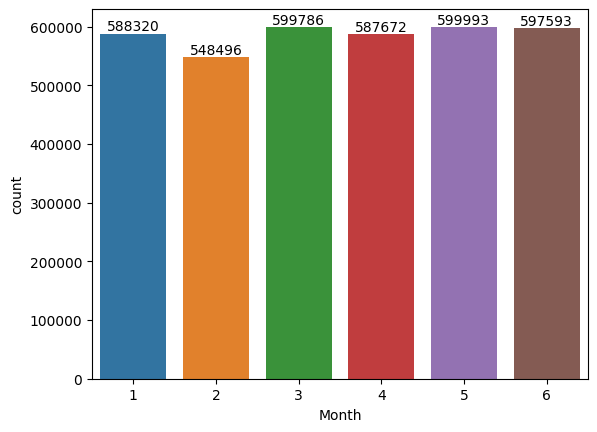

In [158]:
#plotting the Month column to analyse the values distribution in it-

ax = sns.countplot(x ='Month',data=fedex)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The slightly lower number of deliveries in February compared to other months in a 6-month period can be attributed to the fact that February has fewer days. With only 28 days in most years (or 29 in leap years), there are fewer opportunities for deliveries to take place. While other months have either 30 or 31 days, providing more time for deliveries, February's shorter duration naturally leads to a slight decrease in the overall number of deliveries during that month. However, this observation may vary based on factors like holidays, weekends, and specific business operations.

In [159]:
#checking the distinct values present in the Dayofmonth column from highest count to lowest-

(fedex.DayofMonth.value_counts()).sort_values(ascending=False)

20    119222
18    119012
11    118658
14    118515
28    118366
27    118074
21    117715
13    117434
24    117345
7     117276
4     117201
25    116991
15    116782
23    116695
16    116206
2     116196
6     116100
29    115825
17    115509
3     115447
10    114783
22    114466
9     114025
1     114025
5     113763
8     113758
19    113206
26    111998
12    111994
30     99576
31     55697
Name: DayofMonth, dtype: int64

In [160]:
# binning column into bins-

fedex['Dayofmonth'] = pd.cut(fedex['DayofMonth'] ,bins = [0,5,10,15,20,25,31],labels=['0-5Days','5-10Days','10-15Days','15-20Days','20-25Days','25-31Days'])

In [161]:
#checking values after binning-

fedex['Dayofmonth'].value_counts()

25-31Days    619536
10-15Days    583383
20-25Days    583212
15-20Days    583155
0-5Days      576632
5-10Days     575942
Name: Dayofmonth, dtype: int64

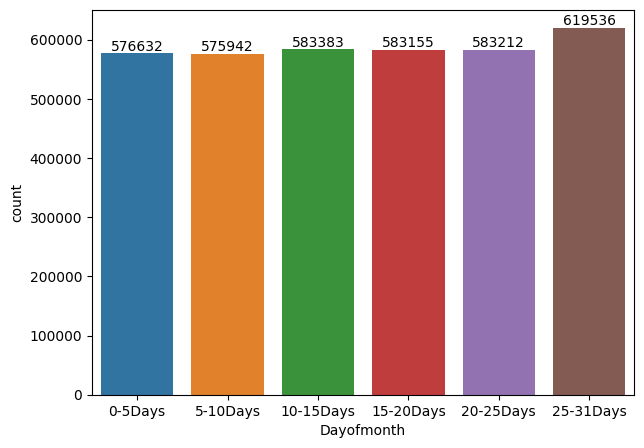

In [162]:
#plotting the Dayofmonth column to analyse the values distribution in it-

plt.figure (figsize=(7,5))
ax = sns.countplot(x='Dayofmonth',data=fedex)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The day of the month usually does not significantly affect the delivery status. Deliveries are generally evenly distributed throughout the month, but there may be slightly higher delivery volumes towards the end of the month. While the presence of an extra day in certain months, like leap year February, may contribute to a small increase in deliveries on that specific day, it has minimal impact on the overall distribution. Factors such as customer ordering patterns, business operations, and deadlines likely influence the day-to-day fluctuations in delivery numbers.

In [163]:
#checking the distinct values present in the Dayofweek column from highest count to lowest-

(fedex.DayOfWeek.value_counts()).sort_values(ascending=False)

4    525085
5    522587
1    520517
3    517130
2    506235
7    493161
6    437145
Name: DayOfWeek, dtype: int64

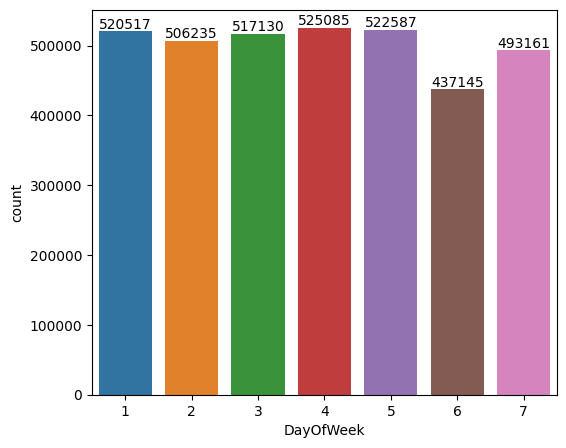

In [164]:
#plotting the DayOfWeek column to analyse the values distribution in it-

plt.figure (figsize=(6,5))
ax = sns.countplot(x='DayOfWeek',data=fedex)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The number of deliveries made on weekends is generally lower compared to weekdays. However, this is not due to the day of the week directly affecting the delivery status. The difference can be attributed to factors such as reduced business activity and lower demand for deliveries during weekends. Weekdays typically see higher delivery volumes due to increased operational activities and business orders, while weekends tend to have more personal activities and reduced commercial operations. It's important to note that the impact of the day of the week on delivery status can vary based on the industry and specific circumstances of each business.

In [165]:
#checking the distinct values present in the carrier_name column from highest count to lowest-

(fedex.Carrier_Name.value_counts()).sort_values(ascending=False)

WN    597355
AA    295655
OO    285266
MQ    243096
UA    227572
US    227500
DL    221899
XE    203343
NW    184421
CO    153934
EV    137936
FL    132368
9E    127032
YV    123664
OH    102897
B6     98846
AS     75377
F9     47711
HA     28230
AQ      7758
Name: Carrier_Name, dtype: int64

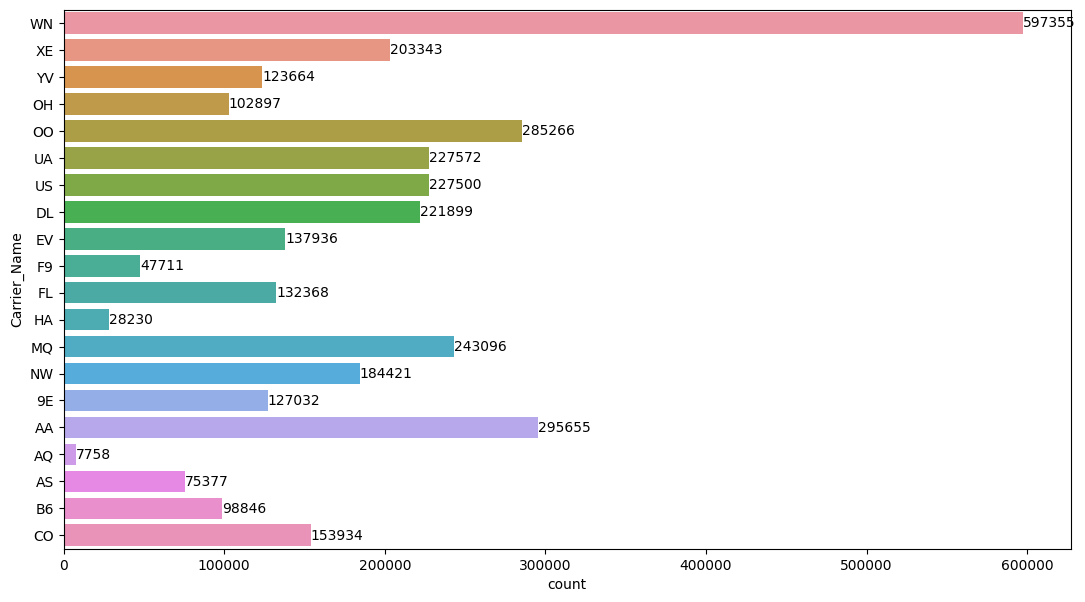

In [166]:
#plotting the Carrier_Name column to analyse the value count in it-

plt.figure (figsize=(13,7))
ax = sns.countplot(y ='Carrier_Name',data=fedex)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

Blaming drivers for late deliveries in local locations within a small range, despite the majority of package deliveries being handled by carriers named WN, OO, and AA, may not be justified. Various factors beyond the control of drivers can contribute to late deliveries, such as traffic congestion, road closures, weather conditions, and logistical challenges within the carrier's network. A comprehensive approach that includes optimizing logistics, improving coordination, and implementing contingency plans is necessary to address these issues and minimize the occurrence of late deliveries.

In [167]:
#checking the distinct values present in the Delivery_Status column from highest count to lowest-

(fedex.Delivery_Status.value_counts()).sort_values(ascending=False)

0    2803902
1     717958
Name: Delivery_Status, dtype: int64

In [168]:
fedex

,Year,Month,DayofMonth,DayOfWeek,actual_shipment_time,planned_shipment_time,planned_delivery_time,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,...,Destination,Distance,Delivery_Status,actual_shipment_time(hour),actual_shipment_time(minute),planned_shipment_time(hour),planned_shipment_time(minute),planned_delivery_time(hour),planned_delivery_time(minute),Dayofmonth
0,2008,1,3,4,20:03,19:55,22:25,2003,1955,2225,...,TPA,810,0,20,3,19,55,22,25,0-5Days
1,2008,1,3,4,07:54,07:35,10:00,754,735,100,...,TPA,810,1,7,54,7,35,10,0,0-5Days
2,2008,1,3,4,06:28,06:02,07:05,628,62,75,...,BWI,515,0,6,28,6,2,7,5,0-5Days
3,2008,1,3,4,09:26,09:03,11:00,926,93,110,...,BWI,515,0,9,26,9,3,11,0,0-5Days
4,2008,1,3,4,18:29,17:55,19:25,1829,1755,1925,...,BWI,515,1,18,29,17,55,19,25,0-5Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604170,2008,6,19,4,10:59,11:00,12:56,1059,110,1256,...,JAC,1572,0,10,59,11,0,12,56,15-20Days
3604171,2008,6,19,4,05:55,06:00,07:38,555,60,738,...,ATL,515,0,5,55,6,0,7,38,15-20Days
3604172,2008,6,19,4,08:21,08:27,10:03,821,827,1003,...,IND,432,0,8,21,8,27,10,3,15-20Days
3604173,2008,6,19,4,07:18,07:35,08:52,718,735,852,...,ATL,191,0,7,18,7,35,8,52,15-20Days


In [169]:
fedex[fedex['Actual_Shipment_Time'] < 50]

,Year,Month,DayofMonth,DayOfWeek,actual_shipment_time,planned_shipment_time,planned_delivery_time,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,...,Destination,Distance,Delivery_Status,actual_shipment_time(hour),actual_shipment_time(minute),planned_shipment_time(hour),planned_shipment_time(minute),planned_delivery_time(hour),planned_delivery_time(minute),Dayofmonth
6233,2008,1,5,6,00:47,20:04,21:45,47,204,2145,...,PVD,328,1,0,47,20,4,21,45,0-5Days
10031,2008,1,6,7,00:22,20:04,23:00,22,204,230,...,TUS,451,1,0,22,20,4,23,0,5-10Days
13443,2008,1,7,1,01:01,21:25,22:35,11,2125,2235,...,OKC,313,1,1,1,21,25,22,35,5-10Days
13599,2008,1,7,1,00:22,21:01,22:25,22,211,2225,...,BNA,395,1,0,22,21,1,22,25,5-10Days
13736,2008,1,7,1,00:41,21:35,00:25,41,2135,25,...,PHL,668,1,0,41,21,35,0,25,5-10Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602623,2008,6,18,3,00:13,21:33,22:18,13,2133,2218,...,SMF,532,1,0,13,21,33,22,18,15-20Days
3602993,2008,6,18,3,00:45,22:44,23:51,45,2244,2351,...,CHS,259,1,0,45,22,44,23,51,15-20Days
3603014,2008,6,18,3,00:34,00:03,06:17,34,3,617,...,ATL,1589,0,0,34,0,3,6,17,15-20Days
3603248,2008,6,19,4,00:19,00:01,06:29,19,1,629,...,JFK,1989,1,0,19,0,1,6,29,15-20Days


In [170]:
# the dataset-

fedex.head()

,Year,Month,DayofMonth,DayOfWeek,actual_shipment_time,planned_shipment_time,planned_delivery_time,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,...,Destination,Distance,Delivery_Status,actual_shipment_time(hour),actual_shipment_time(minute),planned_shipment_time(hour),planned_shipment_time(minute),planned_delivery_time(hour),planned_delivery_time(minute),Dayofmonth
0,2008,1,3,4,20:03,19:55,22:25,2003,1955,2225,...,TPA,810,0,20,3,19,55,22,25,0-5Days
1,2008,1,3,4,07:54,07:35,10:00,754,735,100,...,TPA,810,1,7,54,7,35,10,0,0-5Days
2,2008,1,3,4,06:28,06:02,07:05,628,62,75,...,BWI,515,0,6,28,6,2,7,5,0-5Days
3,2008,1,3,4,09:26,09:03,11:00,926,93,110,...,BWI,515,0,9,26,9,3,11,0,0-5Days
4,2008,1,3,4,18:29,17:55,19:25,1829,1755,1925,...,BWI,515,1,18,29,17,55,19,25,0-5Days


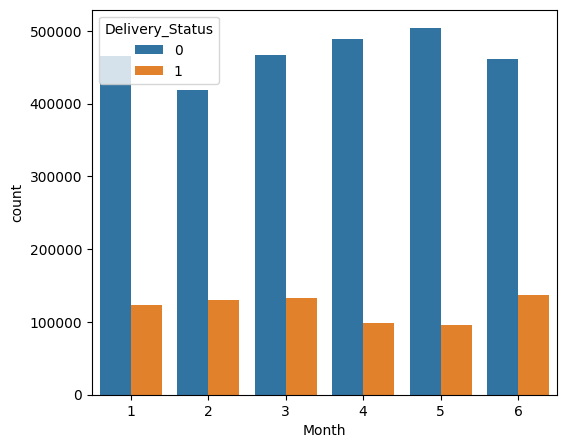

In [171]:
#plotting the graph-

plt.figure (figsize=(6,5))
sns.countplot(x ='Month',data=fedex,hue='Delivery_Status')
plt.show()

Inference-

The majority of late deliveries occur in the first three months and the last month, while the fourth and fifth months experience fewer late deliveries compared to other months. This pattern can be attributed to various factors. The first three months may see delays due to the aftermath of busy holiday seasons, increased order volumes, and potential disruptions caused by weather or logistics challenges. Similarly, the last month may have late deliveries due to the holiday season and high shipping volumes. In contrast, the fourth and fifth months, being outside major holiday periods, experience fewer late deliveries as there is less strain on logistics systems. It's crucial for businesses and carriers to anticipate peak demand periods and make necessary preparations to minimize late deliveries.

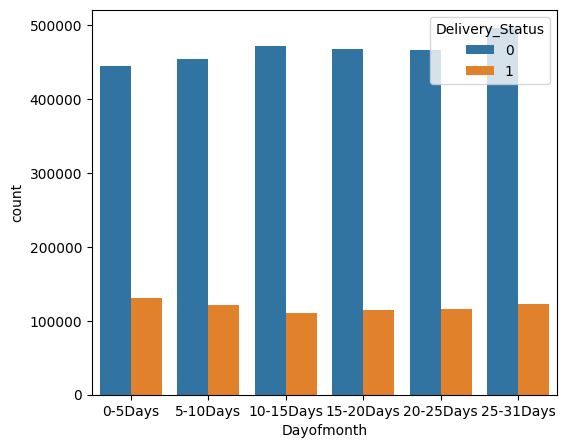

In [172]:
#plotting the graph-

plt.figure (figsize=(6,5))
sns.countplot(x='Dayofmonth',data=fedex,hue = 'Delivery_Status')
plt.show()

Inference-

Regardless of the day of the month, on-time deliveries and late deliveries are generally almost equal. This suggests that the delivery status is not significantly affected by the specific day. Delivery services prioritize efficiency and consistency in their operations, employing strategies such as optimized logistics planning and effective coordination. While external factors can occasionally contribute to late deliveries, the overall aim is to maintain a consistent level of service throughout the month. As a result, on-time and late deliveries are evenly distributed, irrespective of the day within the month.

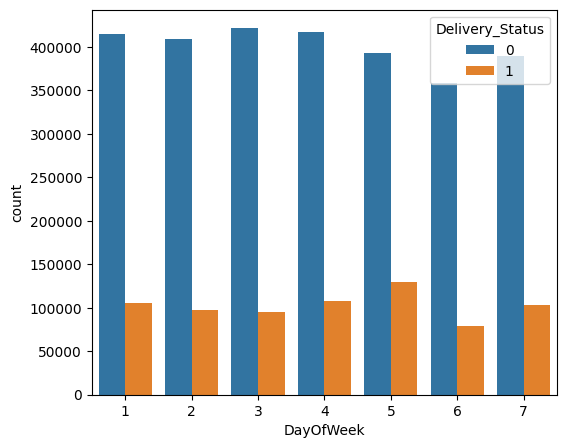

In [173]:
#plotting the graph-

plt.figure (figsize=(6,5))
sns.countplot(x ='DayOfWeek',data=fedex,hue='Delivery_Status')
plt.show()

inference-

On-time deliveries and late deliveries made at any time of the week are generally almost equal, indicating that the day of the week does not significantly affect the delivery status. Delivery services employ efficient logistics planning, optimized routing, and effective coordination to ensure consistent performance and meet delivery deadlines. They strive to provide a consistent level of service throughout the week, regardless of the specific day. Similarly, the day of the month does not have a significant impact on the delivery status as delivery services prioritize efficiency and consistency in their operations. Their focus on maintaining delivery standards helps ensure that on-time and late deliveries are evenly distributed, regardless of the specific day of the week or month.

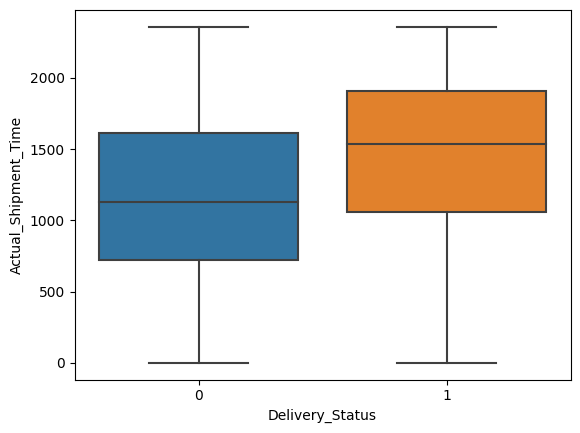

In [174]:
#plotting the graph-

sns.boxplot(x ='Delivery_Status',y='Actual_Shipment_Time',data=fedex)
plt.show()

Inference-

The figure reveals a pattern where most packages delivered on time had an early actual shipment time, while late deliveries were associated with a late actual shipment time. This correlation can be explained by the impact of shipment time on delivery performance. When packages are shipped early, there is more flexibility for transportation and processing, reducing the risk of delays. In contrast, late actual shipment times provide less leeway for unforeseen challenges, increasing the likelihood of delivery delays. While factors such as logistics efficiency and external influences can also influence delivery performance, the general trend observed suggests that initiating shipments early improves the chances of on-time delivery, while late shipments are more susceptible to delays.

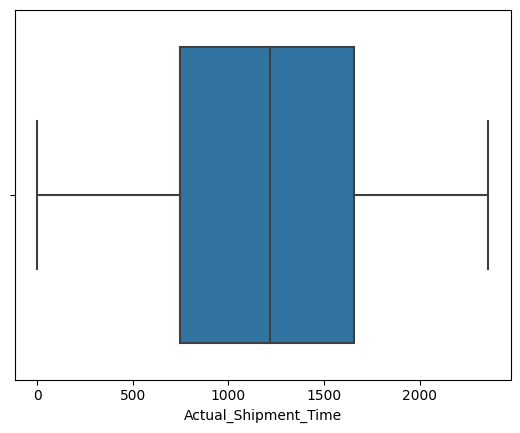

In [175]:
#plotting the graph-

sns.boxplot(x ='Actual_Shipment_Time',data=fedex)
plt.show()

Inference-

Most packages tend to have an average actual shipment time between 9 am to 5 pm, which aligns with the typical working hours of many workers. During this time, businesses can leverage the availability and efficiency of their workforce to handle shipments promptly. By scheduling shipments within this timeframe, companies can reduce processing times and ensure a smooth handover of packages to shipping carriers who also operate within these hours. It is important to consider that this pattern may vary based on industry practices, regional customs, and the specific nature of the goods being shipped.

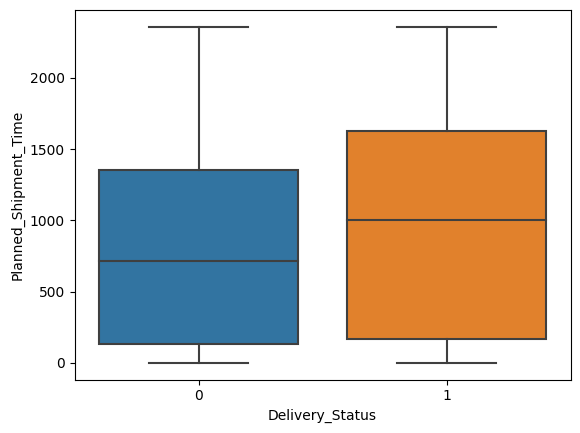

In [176]:
#plotting the graph-

sns.boxplot(x ='Delivery_Status',y='Planned_Shipment_Time',data=fedex)
plt.show()

Inference-

The figure demonstrates that most packages delivered on time had an early planned shipment time, while late deliveries were associated with a late planned shipment time. However, there were cases where packages were shipped early but still delivered late. This can be attributed to unforeseen circumstances and disruptions that can occur during transit or at the delivery destination. Factors such as logistical challenges, transportation delays, customs issues, or external events like adverse weather conditions can contribute to delayed deliveries, even with early planning. It highlights the importance of effective contingency plans and communication to mitigate such delays and ensure timely delivery.

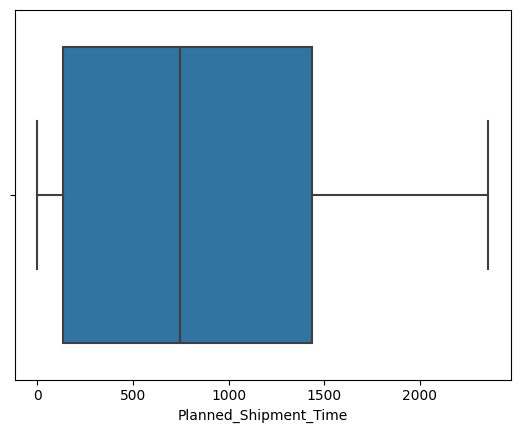

In [177]:
#plotting the graph-

sns.boxplot(x ='Planned_Shipment_Time',data=fedex)
plt.show()

Inference-

Most packages had an average planned shipment time between 2 am to 2:50 pm to ensure delivery by the evening. Scheduling early shipment times allows for sufficient time for transportation, processing, and sorting before the actual delivery process begins. This early planning provides a buffer for potential delays and unforeseen circumstances, such as traffic or higher package volumes. It also allows packages to be in transit for a significant portion of the day, increasing the likelihood of timely delivery. The specific timing of planned shipments may vary based on industry practices and regional logistics.



In [178]:
# these values need to be binned to get a clear picture-

fedex['planned_ship_time'] = pd.cut(fedex['Planned_Shipment_Time'], bins=[0,500,1000,1500,2000,2400], labels=['0-500','500-1000','1000-1500','1500-2000','2000-2400'])

In [179]:
# these values need to be binned to get a clear picture-

fedex['plan_timeoftravel'] = pd.cut(fedex['Planned_TimeofTravel'], bins=[0,100,200,300,400,500,600,700], labels=['0-100','100-200','200-300','300-400','400-500','500-600','600-700'])

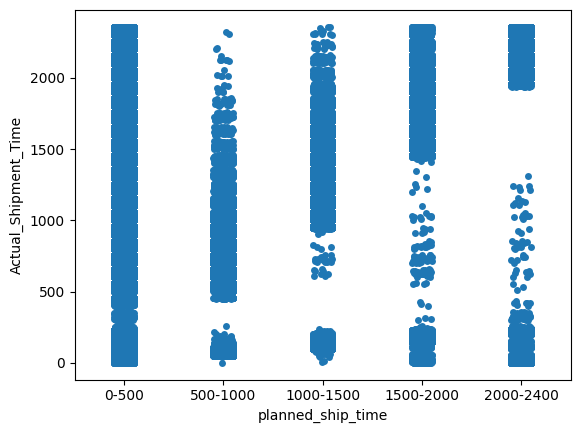

In [180]:
#plotting the graph-

sns.stripplot(data=fedex,x='planned_ship_time', y='Actual_Shipment_Time')
plt.show()

Inference-

Most packages in the figure had the same actual shipment time as their planned shipment time, indicating they were processed and shipped as scheduled. Only some of them didn't match the pattern so they were shipped late causing later delivery of the product.

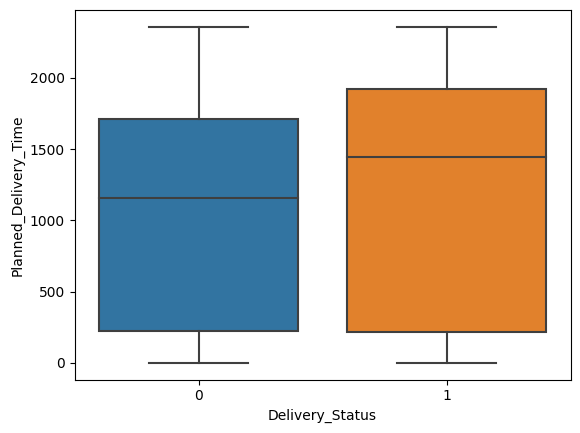

In [181]:
#plotting the graph-

sns.boxplot(x ='Delivery_Status',y='Planned_Delivery_Time',data=fedex)
plt.show()

Inference-

The figure shows that packages delivered on time had an early planned delivery time compared to those that were delivered late. This highlights the importance of setting an early planned delivery time to increase the chances of on-time delivery. By allowing for a buffer period, any unforeseen delays or disruptions in the delivery process can be accommodated. In contrast, packages with late deliveries may have had a planned delivery time that was too close to the desired deadline, leaving little room for contingencies. To improve delivery performance, it is essential to establish realistic and early planned delivery times that account for potential delays, ultimately enhancing the overall efficiency of the delivery process.

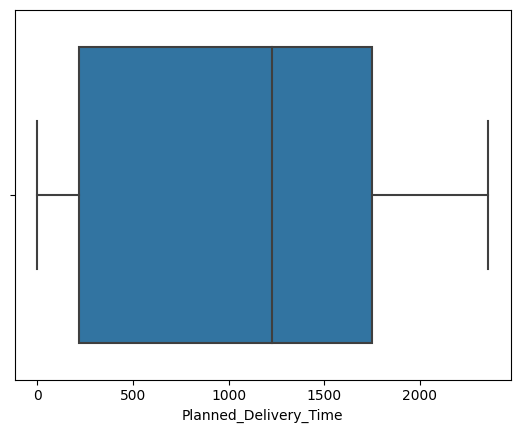

In [182]:
#plotting the graph-

sns.boxplot(x ='Planned_Delivery_Time',data=fedex)
plt.show()

Inference-

Most packages had an average planned delivery time between 2 am to 5 pm, which aligns with the period when customers are more likely to be available at home. During the early morning, people are often occupied with work, school, or college commitments, making it less convenient for package deliveries. However, as the day progresses, customers tend to return home, increasing the chances of being present to receive their packages. By scheduling deliveries during the later part of the day, it maximizes the likelihood of successful deliveries and reduces the need for redelivery attempts. This customer-centric approach enhances satisfaction by ensuring packages are received promptly and minimizing the risk of missed deliveries.

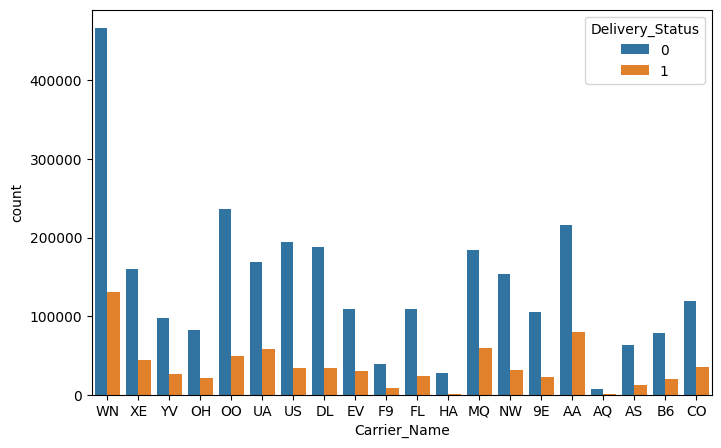

In [183]:
#plotting the graph--

plt.figure (figsize=(8,5))
sns.countplot(x='Carrier_Name',data=fedex,hue='Delivery_Status')
plt.show()

Inference-

The figure shows that carriers with a majority of on-time deliveries also had a significant number of late deliveries. This indicates that blaming specific carriers for late deliveries alone would be unfair, as carrier name does not solely determine the delivery status. Various factors, such as weather conditions, traffic congestion, and logistical challenges, can contribute to delays in the delivery process. To improve overall delivery performance, it is important to address systemic issues rather than focusing solely on individual carriers. By implementing measures to optimize logistics, enhance communication, and improve operational efficiency, the overall delivery process can be improved, regardless of the carrier involved.

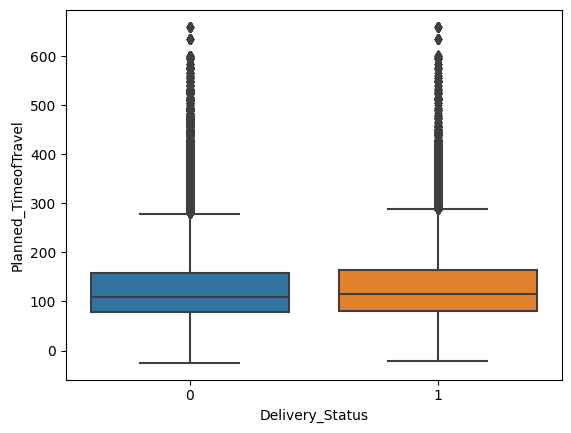

In [184]:
#plotting the graph-

sns.boxplot(x ='Delivery_Status',y='Planned_TimeofTravel',data=fedex)
plt.show()

Inference-

The figure indicates that the majority of package deliveries were planned to be completed within 200 minutes, representing the expected time for delivery from source to destination. However, some packages had a shorter planned delivery time of under 150 minutes. This variation could be due to factors such as package nature, customer preferences, or time-sensitive shipments. By adjusting the planned delivery time based on specific needs, businesses can ensure efficient and timely deliveries. Considering package characteristics, customer requirements, and logistics strategy helps determine the appropriate planned delivery time for each shipment.

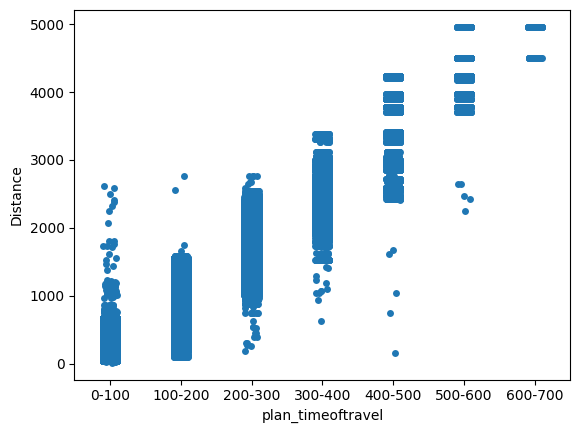

In [185]:
#plotting the graph-

sns.stripplot(data=fedex, x='plan_timeoftravel',y ='Distance')
plt.show()

Inference-

The figure illustrates that there is a direct relationship between distance and the planned time of travel. As the distance increases, the planned time of travel also increases. This is due to various factors such as the need for additional transportation time, coordination of multiple modes of transport, and potential customs procedures for longer distances. By considering these factors and adjusting the planned time accordingly, businesses can establish efficient and realistic delivery schedules that account for the challenges associated with longer distances.

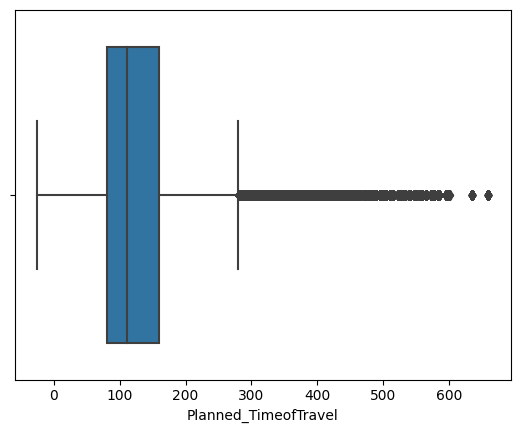

In [186]:
#plotting the graph-

sns.boxplot(x ='Planned_TimeofTravel',data=fedex)
plt.show()

Inference-

The majority of planned time of travel falls within the 80 to 180 minutes range, emphasizing the importance of timely or early deliveries. This range is chosen for several reasons. Firstly, it ensures efficiency in resource allocation and logistics, considering factors like distance and traffic conditions. Secondly, it provides a reliable estimate of transit time, aiding in delivery scheduling and route planning. Additionally, the range allows for contingencies, accommodating unforeseen delays that may arise during delivery. Ultimately, setting a planned time of travel within this range aims to satisfy customers by delivering on time or even ahead of schedule. It strikes a balance between operational effectiveness and customer expectations, optimizing the delivery process.

In [187]:
fedex[fedex['Planned_TimeofTravel'] >= 600]

,Year,Month,DayofMonth,DayOfWeek,actual_shipment_time,planned_shipment_time,planned_delivery_time,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,...,Delivery_Status,actual_shipment_time(hour),actual_shipment_time(minute),planned_shipment_time(hour),planned_shipment_time(minute),planned_delivery_time(hour),planned_delivery_time(minute),Dayofmonth,planned_ship_time,plan_timeoftravel
302944,2008,1,15,2,10:06,10:05,15:05,1006,1005,1505,...,0,10,6,10,5,15,5,10-15Days,1000-1500,500-600
304184,2008,1,16,3,10:05,10:05,15:05,1005,1005,1505,...,0,10,5,10,5,15,5,15-20Days,1000-1500,500-600
305456,2008,1,17,4,10:12,10:05,15:05,1012,1005,1505,...,0,10,12,10,5,15,5,15-20Days,1000-1500,500-600
306759,2008,1,18,5,10:01,10:05,15:05,101,1005,1505,...,0,10,1,10,5,15,5,15-20Days,1000-1500,500-600
307922,2008,1,19,6,10:05,10:05,15:05,1005,1005,1505,...,0,10,5,10,5,15,5,15-20Days,1000-1500,500-600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574994,2008,6,25,3,14:02,13:35,18:01,1402,1335,181,...,1,14,2,13,35,18,1,20-25Days,1000-1500,600-700
3574998,2008,6,23,1,13:54,13:35,18:01,1354,1335,181,...,1,13,54,13,35,18,1,20-25Days,1000-1500,600-700
3575873,2008,6,1,7,15:01,13:35,18:01,151,1335,181,...,1,15,1,13,35,18,1,0-5Days,1000-1500,600-700
3577053,2008,6,20,5,13:05,13:35,18:01,135,1335,181,...,0,13,5,13,35,18,1,15-20Days,1000-1500,600-700


In [188]:
# dropping certain outliers or anamolies-
 
fedex.drop(fedex[fedex.Planned_TimeofTravel >= 600].index,inplace=True)

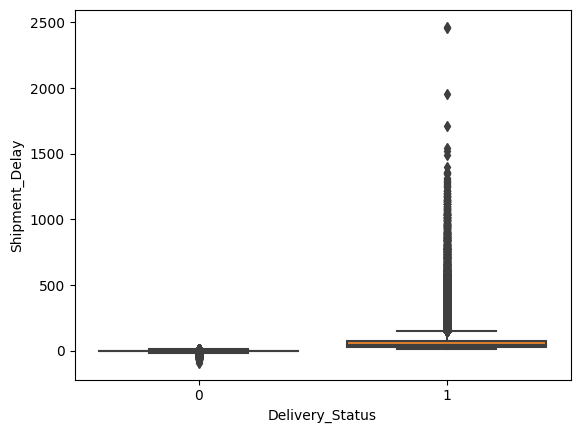

In [189]:
#plotting the graph-

sns.boxplot(x ='Delivery_Status',y='Shipment_Delay',data=fedex)
plt.show()

Inference-

The figure demonstrates a clear relationship between shipment delay and late deliveries. When there is a delay in shipment, the packages are consistently delivered late, whereas in the absence of shipment delay, the packages are delivered on time. This highlights the direct impact of shipment delay on the timeliness of deliveries. Shipment delay occurs due to various factors such as logistical issues, transportation disruptions, and customs clearance delays. These delays disrupt the planned delivery schedule, resulting in subsequent delays throughout the transportation process. To ensure timely deliveries, it is essential to address the underlying causes of shipment delay and implement measures to minimize such delays in the logistics and transportation system. By improving operational efficiency and taking proactive measures to mitigate delays, businesses can significantly reduce the occurrence of late deliveries and enhance customer satisfaction.

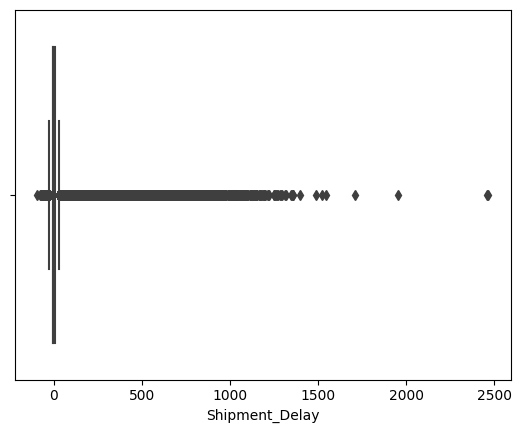

In [190]:
#plotting the graph-

sns.boxplot(x ='Shipment_Delay',data=fedex)
plt.show()

Inference-

The figure indicates that a small number of packages experienced a significant delay of 1000 minutes, resulting in late delivery. Conversely, a considerable number of packages were shipped early and arrived on time. Early shipments provide a buffer against potential delays and disruptions during transit, ensuring a higher chance of on-time delivery. Efficient planning and coordination contribute to these early shipments, allowing businesses to optimize logistics and transportation processes. By minimizing delays and adopting proactive strategies, businesses can improve their ability to deliver packages punctually and enhance customer satisfaction.

In [191]:
# dropping certain outliers or anamolies

fedex[fedex['Shipment_Delay'] > 1300 ]

,Year,Month,DayofMonth,DayOfWeek,actual_shipment_time,planned_shipment_time,planned_delivery_time,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,...,Delivery_Status,actual_shipment_time(hour),actual_shipment_time(minute),planned_shipment_time(hour),planned_shipment_time(minute),planned_delivery_time(hour),planned_delivery_time(minute),Dayofmonth,planned_ship_time,plan_timeoftravel
503727,2008,1,16,3,18:05,19:03,22:15,1805,193,2215,...,1,18,5,19,3,22,15,15-20Days,0-500,100-200
996512,2008,2,15,5,12:57,14:02,16:05,1257,142,165,...,1,12,57,14,2,16,5,10-15Days,0-500,100-200
1006701,2008,2,22,5,07:18,08:05,14:05,718,85,1405,...,1,7,18,8,5,14,5,20-25Days,0-500,100-200
1018798,2008,2,3,7,11:17,18:02,05:55,1117,182,555,...,1,11,17,18,2,5,55,0-5Days,0-500,400-500
1097934,2008,2,5,2,10:31,12:35,14:15,1031,1235,1415,...,1,10,31,12,35,14,15,0-5Days,1000-1500,100-200
1634129,2008,3,21,5,07:05,06:15,07:21,705,615,721,...,1,7,5,6,15,7,21,20-25Days,500-1000,0-100
1705852,2008,3,8,6,12:56,11:35,17:37,1256,1135,1737,...,1,12,56,11,35,17,37,5-10Days,1000-1500,300-400
2226951,2008,4,18,5,06:12,08:21,12:23,612,821,1223,...,1,6,12,8,21,12,23,15-20Days,500-1000,100-200
2232494,2008,4,27,7,18:18,16:33,18:00,1818,1633,180,...,1,18,18,16,33,18,0,25-31Days,1500-2000,0-100
2234143,2008,4,24,4,08:21,09:00,13:58,821,90,1358,...,1,8,21,9,0,13,58,20-25Days,0-500,200-300


In [192]:
fedex.drop(fedex[fedex.Shipment_Delay > 1300].index,inplace=True)

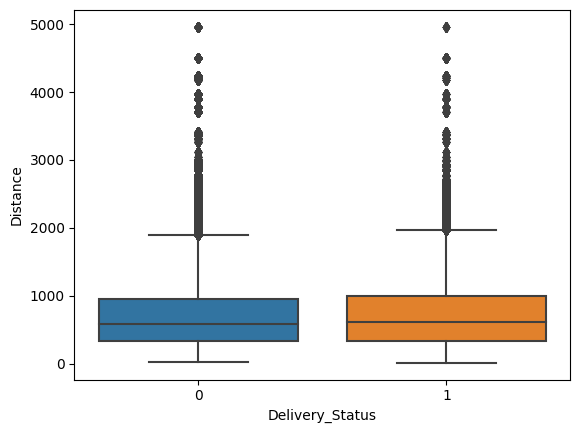

In [193]:
#plotting the graph-

sns.boxplot(x ='Delivery_Status',y='Distance',data=fedex)
plt.show()

Inference-

Distance does not impact the delivery status, as observed in the figure. Packages are consistently delivered in a timely manner, irrespective of the distance involved. This can be attributed to efficient routing and logistics systems that optimize transportation processes, regardless of the distance.

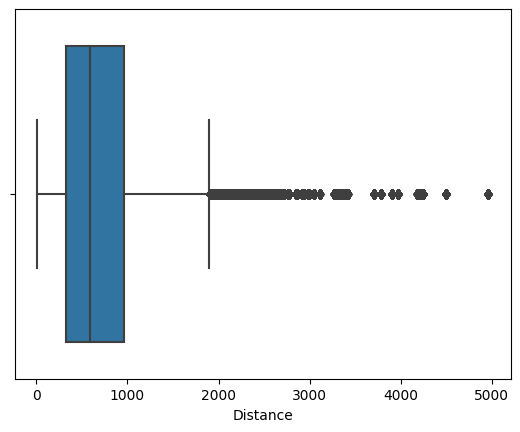

In [194]:
#plotting the graph-

sns.boxplot(x ='Distance',data=fedex)
plt.show()

Inference-

The figure reveals that the majority of deliveries, whether early or late, fall within an average range of 1000 miles. This suggests that distance alone does not significantly impact the timeliness of deliveries. Delivery services have strategically designed their operational networks and utilized advancements in transportation and technology to efficiently handle deliveries within this range. By optimizing logistics and distribution centers, companies can ensure prompt deliveries despite the distance involved. Moreover, meeting customer expectations for timely deliveries has driven the industry to prioritize efficiency and reliability across various distances. In conclusion, the figure demonstrates that most deliveries occur within the observed 1000-mile range, indicating that other factors, such as operational efficiency and technological advancements, play a more significant role in delivery timeliness than distance alone.

In [195]:
fedex[fedex['Distance'] > 2000]

,Year,Month,DayofMonth,DayOfWeek,actual_shipment_time,planned_shipment_time,planned_delivery_time,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,...,Delivery_Status,actual_shipment_time(hour),actual_shipment_time(minute),planned_shipment_time(hour),planned_shipment_time(minute),planned_delivery_time(hour),planned_delivery_time(minute),Dayofmonth,planned_ship_time,plan_timeoftravel
29,2008,1,3,4,07:34,07:03,10:02,734,73,102,...,0,7,34,7,3,10,2,0-5Days,0-500,300-400
86,2008,1,3,4,18:32,16:55,00:03,1832,1655,3,...,1,18,32,16,55,0,3,0-5Days,1500-2000,200-300
91,2008,1,3,4,17:39,16:04,00:25,1739,164,25,...,1,17,39,16,4,0,25,0-5Days,0-500,200-300
113,2008,1,3,4,09:08,08:45,16:01,908,845,161,...,1,9,8,8,45,16,1,0-5Days,500-1000,200-300
114,2008,1,3,4,18:17,17:03,00:05,1817,173,5,...,1,18,17,17,3,0,5,0-5Days,0-500,200-300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604151,2008,6,19,4,11:01,11:01,13:12,111,111,1312,...,0,11,1,11,1,13,12,15-20Days,0-500,300-400
3604153,2008,6,19,4,08:41,08:36,10:35,841,836,1035,...,0,8,41,8,36,10,35,15-20Days,500-1000,200-300
3604158,2008,6,19,4,18:31,18:03,20:31,1831,183,2031,...,0,18,31,18,3,20,31,15-20Days,0-500,300-400
3604161,2008,6,19,4,11:32,11:25,19:13,1132,1125,1913,...,0,11,32,11,25,19,13,15-20Days,1000-1500,200-300


In [196]:
fedex.drop(fedex[fedex.Distance > 2000].index,inplace=True)

In [197]:
# reindexing the columns-

fedex = fedex.reindex(columns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'actual_shipment_time','planned_shipment_time', 'planned_delivery_time','actual_shipment_time(hour)','actual_shipment_time(minute)', 'planned_shipment_time(hour)','planned_shipment_time(minute)', 'planned_delivery_time(hour)','planned_delivery_time(minute)','Planned_TimeofTravel', 'Shipment_Delay','Destination', 'Distance', 'Delivery_Status'])

Conclusion-

There is only one reason which indicates late deliveries which is shipment delay, what we can do is appoint special task managers to understand which places have the highest rates of shipment delay and they should be deployed to these places. workers should be increased in the areas where there is more shipment delay and workers should be deacreased in the areas where there is less shipment delay.so therefore we can probably say these will be effective measures in decreasing late deliveries.

In [198]:
# our target column-

y = fedex.Delivery_Status

In [199]:
# the columns which have direct or indirect relation with target column-

x = fedex.iloc[:,7:-3]
x

,actual_shipment_time(hour),actual_shipment_time(minute),planned_shipment_time(hour),planned_shipment_time(minute),planned_delivery_time(hour),planned_delivery_time(minute),Planned_TimeofTravel,Shipment_Delay
0,20,3,19,55,22,25,150.0,8.0
1,7,54,7,35,10,0,145.0,19.0
2,6,28,6,2,7,5,90.0,8.0
3,9,26,9,3,11,0,90.0,-4.0
4,18,29,17,55,19,25,90.0,34.0
...,...,...,...,...,...,...,...,...
3604170,10,59,11,0,12,56,236.0,-1.0
3604171,5,55,6,0,7,38,98.0,-5.0
3604172,8,21,8,27,10,3,96.0,-6.0
3604173,7,18,7,35,8,52,77.0,-17.0


In [200]:
# train test split-

from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test) = train_test_split(x,y,test_size = 0.2,random_state=42)

In [201]:
# importing machine learning alorithms-

from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier
model_3 = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier()

from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

# Logistic Regression

In [202]:
model_1.fit(x_train,y_train)

predict_1 = model_1.predict(x_test)

accuracy_score(y_test,predict_1)

ml = accuracy_score(y_test,predict_1)

print('Logistic Regression model accuracy  :' , ml)

Logistic Regression model accuracy  : 1.0


In [203]:
ps = precision_score(y_test,predict_1)

print('precision score of model : ',ps)

precision score of model :  1.0


In [204]:
confusion_matrix(y_test,predict_1)

array([[535594,      0],
       [     0, 136925]])

# KNeighbors Classifier

In [205]:
model_2.fit(x_train,y_train)

predict_2 = model_2.predict(x_test)

accuracy_score(y_test,predict_2)

ml_2 = accuracy_score(y_test,predict_2)

print('KNeighbors Classifier model accuracy  :' , ml_2)

KNeighbors Classifier model accuracy  : 0.997594120017427


In [206]:
ps_1 = precision_score(y_test,predict_2)

print('precision score of model : ',ps_1)

precision score of model :  0.9956409298372858


In [207]:
confusion_matrix(y_test,predict_2)

array([[534999,    595],
       [  1023, 135902]])

# Decision TreeClassifier

In [208]:
model_3.fit(x_train,y_train)

predict_3 = model_3.predict(x_test)

accuracy_score(y_test,predict_3)

ml_3 = accuracy_score(y_test,predict_3)

print('DecisionTree Classifier model accuracy :' , ml_3)

DecisionTree Classifier model accuracy : 1.0


In [209]:
ps_2 = precision_score(y_test,predict_3)

print('precision score of model : ',ps_2)

precision score of model :  1.0


In [210]:
confusion_matrix(y_test,predict_3)

array([[535594,      0],
       [     0, 136925]])

# RandomForest Classifier

In [211]:
model_4.fit(x_train,y_train)

predict_4 = model_4.predict(x_test)

accuracy_score(y_test,predict_4)

ml_4 = accuracy_score(y_test,predict_4)

print('RandomForest Classifier model accuracy  :' , ml_4)

RandomForest Classifier model accuracy  : 1.0


In [212]:
ps_3 = precision_score(y_test,predict_4)

print('precision score of model : ',ps_3)

precision score of model :  1.0


In [213]:
confusion_matrix(y_test,predict_4)

array([[535594,      0],
       [     0, 136925]])

a precision score closer to 1.0 generally indicates better performance of a classification model, as it means the model is making fewer false positive predictions.

There are there models with same precison and confusion matrix.

these three are the best fit models.